In [1]:
from RFEM.Results.resultTables import GetMaxValue, GetMinValue, ResultTables
from RFEM.initModel import Model, Calculate_all
from RFEM.enums import CaseObjectType
# RFEM 6
Model(False, "TVS_Versuch_2_A3_Jaeger.rf6")
Model.clientModel.service.begin_modification()
Calculate_all()
results_real =  ResultTables.MembersInternalForces(loading_type=CaseObjectType.E_OBJECT_TYPE_LOAD_CASE,
                                              loading_no=1,
                                              object_no=1)

results_virtuell = ResultTables.MembersInternalForces(loading_type=CaseObjectType.E_OBJECT_TYPE_LOAD_CASE,
                                              loading_no=2,
                                              object_no=1)

Model.clientModel.service.finish_modification()

Connecting to server...


In [3]:
# Beispiel-Liste mit Dictionaries
my_list = results_real

# Schritt 1: Duplikate entfernen und Dictionaries ohne Einträge überspringen
unique_list = []
seen_node_numbers = set()

for entry in my_list:
    if entry and 'node_number' in entry:  # Überprüfe, ob das Dictionary Einträge enthält und 'node_number' hat
        if entry['node_number'] not in seen_node_numbers:
            unique_list.append(entry)
            seen_node_numbers.add(entry['node_number'])

# Schritt 2: Nach 'node_number' sortieren
sorted_list = sorted(unique_list, key=lambda x: x['node_number'])
M_y_array = []
# Ergebnis ausgeben
for entry in sorted_list:
    M_y_array.append(entry['internal_force_my'])


In [4]:
# Beispiel-Liste mit Dictionaries
my_list = results_virtuell

# Schritt 1: Duplikate entfernen und Dictionaries ohne Einträge überspringen
unique_list = []
seen_node_numbers = set()

for entry in my_list:
    if entry and 'node_number' in entry:  # Überprüfe, ob das Dictionary Einträge enthält und 'node_number' hat
        if entry['node_number'] not in seen_node_numbers:
            unique_list.append(entry)
            seen_node_numbers.add(entry['node_number'])

# Schritt 2: Nach 'node_number' sortieren
sorted_list = sorted(unique_list, key=lambda x: x['node_number'])
M_y_array_virtuell = []
# Ergebnis ausgeben
for entry in sorted_list:
    M_y_array_virtuell.append(entry['internal_force_my'])

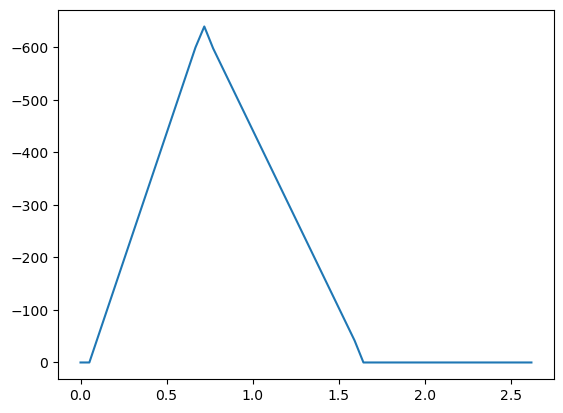

In [6]:
import numpy as np

import matplotlib.pyplot as plt


x_array = np.linspace(0,2.62, len(sorted_list))

plt.plot(x_array, M_y_array_virtuell)
plt.gca().invert_yaxis()

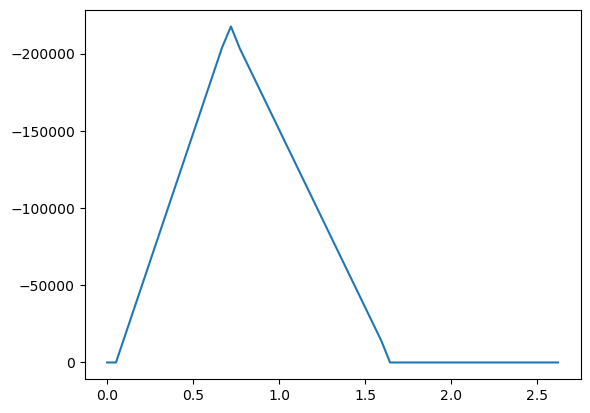

In [5]:
import numpy as np

import matplotlib.pyplot as plt


x_array = np.linspace(0,2.62, len(sorted_list))

plt.plot(x_array, M_y_array)
plt.gca().invert_yaxis()

